In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log,dot,e,shape
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)

df = pd.read_csv('cleveland.csv', header = None)
df.drop(index=0)
df.drop
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

### 1 = male, 0 = female
df.isnull().sum()

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

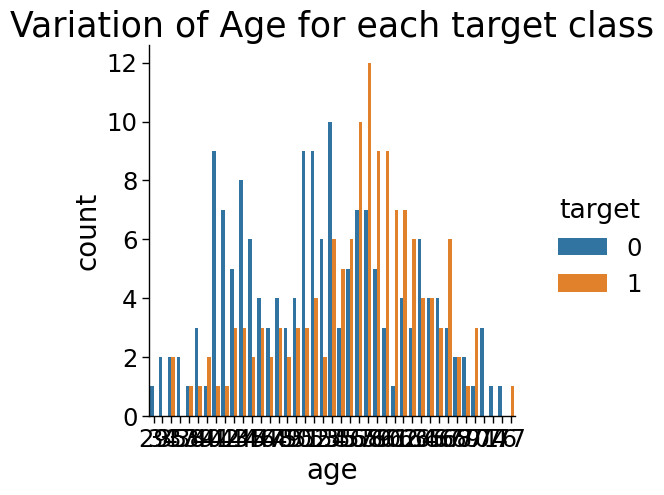

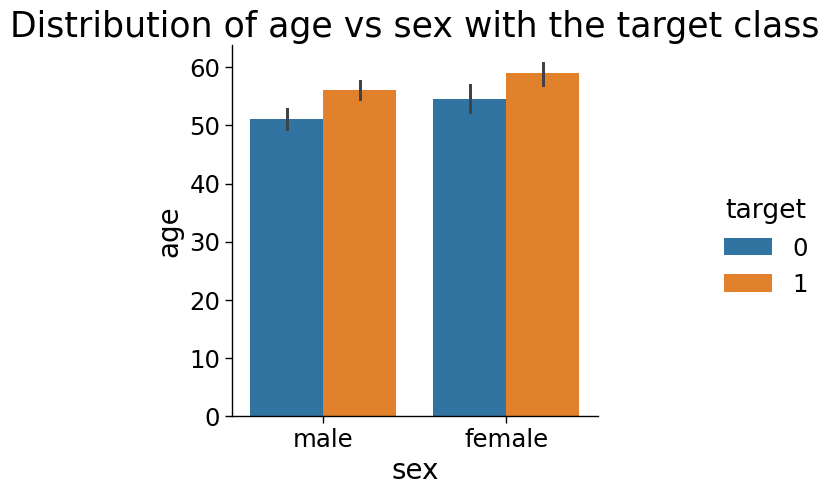

In [3]:
# distribution of target vs age 
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

 
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

df['sex'] = df.sex.map({'female': 0, 'male': 1})

################################## data preprocessing ##############################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
class LogisticRegression:
    def sigmoid(self,z):
        sig = 1/(1+e**(-z))
        return sig
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis


In [5]:
def confusionMatrix(actual, predicted):
  
    classes = np.unique(actual)

    # initialize the confusion matrix
    confmat = np.zeros((len(classes), len(classes)))

    # loop across the different combinations of actual / predicted classes
    for i in range(len(classes)):
        for j in range(len(classes)):

           # count the number of instances in each combination of actual / predicted classes
           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confmat


In [6]:
#########################################   Logistic Regression  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)


classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm_test = confusionMatrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusionMatrix(y_pred_train, y_train)

print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for Logistic Regression = 0.5666666666666667
Accuracy for test set for Logistic Regression = 0.5637860082304527


/var/folders/9m/310gf25n53df7xhg6ftpz_rw0000gn/T/ipykernel_34015/4222987388.py:14: RuntimeWarning: divide by zero encountered in log
  cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
/var/folders/9m/310gf25n53df7xhg6ftpz_rw0000gn/T/ipykernel_34015/4222987388.py:3: RuntimeWarning: overflow encountered in power
  sig = 1/(1+e**(-z))
/var/folders/9m/310gf25n53df7xhg6ftpz_rw0000gn/T/ipykernel_34015/4222987388.py:13: RuntimeWarning: divide by zero encountered in log
  cost0 = y.T.dot(log(self.sigmoid(z)))


In [7]:
#########################################   SVM   #############################################################

classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


cm_test = confusionMatrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusionMatrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for svm = 0.65
Accuracy for test set for svm = 0.6008230452674898


In [8]:
class gaussClf:
    def separate_by_classes(self, X, y):
        self.classes = np.unique(y)
        classes_index = {}
        subdatasets = {}
        cls, counts = np.unique(y, return_counts=True)
        self.class_freq = dict(zip(cls, counts))
        print(self.class_freq)
        for class_type in self.classes:
            classes_index[class_type] = np.argwhere(y==class_type)
            subdatasets[class_type] = X[classes_index[class_type], :]
            self.class_freq[class_type] = self.class_freq[class_type]/sum(list(self.class_freq.values()))
        return subdatasets
    def fit(self, X, y):
      separated_X = self.separate_by_classes(X, y)
      self.means = {}
      self.std = {}
      for class_type in self.classes:
          self.means[class_type] = np.mean(separated_X[class_type], axis=0)[0]
          self.std[class_type] = np.std(separated_X[class_type], axis=0)[0]
    def calculate_probability(self, x, mean, stdev):
      exponent = math.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
      return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent
    def predict_proba(self, X):
      self.class_prob = {cls:math.log(self.class_freq[cls], math.e) for cls in self.classes}
      for cls in self.classes:
          for i in range(len(self.means)):
              self.class_prob[cls]+=math.log(self.calculate_probability(X[i], self.means[cls][i], self.std[cls][i]), math.e)
      self.class_prob = {cls: math.e**self.class_prob[cls] for cls in self.class_prob}
      return self.class_prob
    def predict(self, X):
      pred = []
      for x in X:
          pred_class = None
          max_prob = 0
          for cls, prob in self.predict_proba(x).items():
              if prob>max_prob:
                  max_prob = prob
                  pred_class = cls
          pred.append(pred_class)
      return pred

In [9]:
#########################################   Naive Bayes  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = gaussClf()
classifier.fit(X_train, y_train)


{0: 129, 1: 113}


In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm_test = confusionMatrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusionMatrix(y_pred_train, y_train)

print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Naive Bayes = 0.5619834710743802
Accuracy for test set for Naive Bayes = 0.639344262295082


In [11]:

#########################################   Decision Tree  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


cm_test = confusionMatrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusionMatrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7540983606557377
